## KALKULASI HISTOGRAM

Downloading...
From: https://drive.google.com/uc?id=1jwrW5d4AmUutLl0hUscOePqimXO8IBFS
To: C:\Windows\System32\image.jpg
100%|███████████████████████████████████████████████████████████████████████████████| 143k/143k [00:00<00:00, 1.94MB/s]


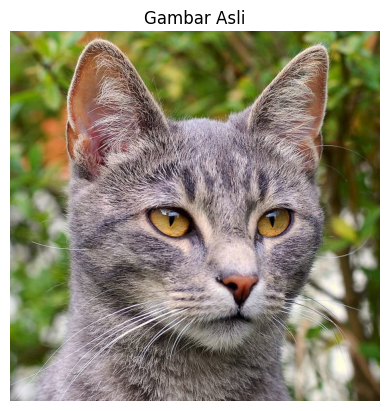

In [40]:
# Import library
import cv2
import numpy as np
import matplotlib.pyplot as plt
import gdown

# Download gambar
url = 'https://drive.google.com/uc?id=1jwrW5d4AmUutLl0hUscOePqimXO8IBFS' 
output = 'image.jpg'
gdown.download(url, output, quiet=False)

# Membuka dan menampilkan gambar asli
image = cv2.imread(output)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title("Gambar Asli")
plt.axis("off")
plt.show()

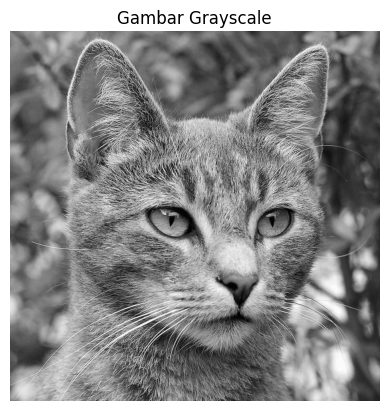

In [41]:
# Konversi gambar ke grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Menampilkan gambar grayscale
plt.imshow(image_gray, cmap='gray')
plt.title("Gambar Grayscale")
plt.axis("off")
plt.show()

### 1. Kalkulasi Histogram Grayscale

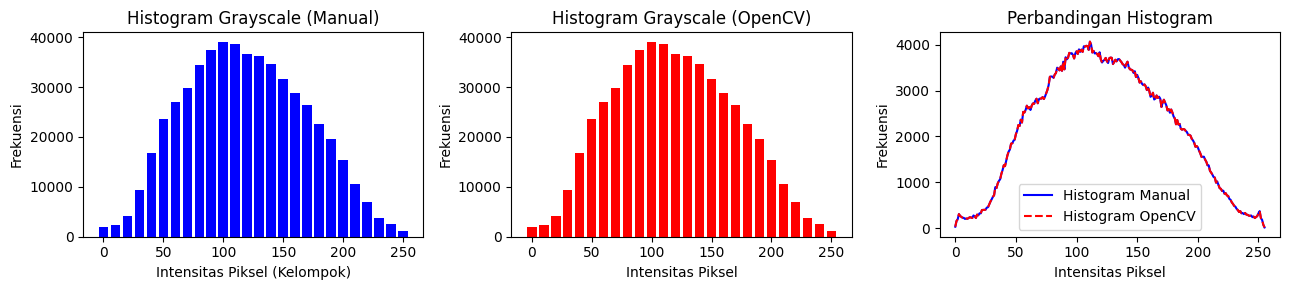

In [78]:
# Kalkulasi histogram gambar grayscale secara manual
hist_manual = np.zeros(256, dtype=int)
for row in image_gray:
    for pixel in row:
        hist_manual[pixel] += 1

# Menggunakan OpenCV untuk menghitung histogram
hist_cv = cv2.calcHist([image_gray], [0], None, [256], [0, 256]).flatten()
bins = np.arange(256)

bin_size = 10  
bins = np.arange(0, 256, bin_size) 
hist_binned = [sum(hist_manual[i:i + bin_size]) for i in bins]
hist_binnedcv = [sum(hist_cv[i:i + bin_size]) for i in bins]
fig, axes = plt.subplots(1, 3, figsize=(13, 3))  

# Plot Histogram Manual
axes[0].bar(bins, hist_binned, color='blue', width=8)
axes[0].set_title("Histogram Grayscale (Manual)")
axes[0].set_xlabel("Intensitas Piksel (Kelompok)")
axes[0].set_ylabel("Frekuensi")
axes[0].set_xticks(np.arange(0, 256, 50))

# Plot Histogram OpenCV
axes[1].bar(bins, hist_binnedcv, color='red', width=8)
axes[1].set_title("Histogram Grayscale (OpenCV)")
axes[1].set_xlabel("Intensitas Piksel")
axes[1].set_ylabel("Frekuensi")
axes[1].set_xticks(np.arange(0, 256, 50))

# Plot Perbandingan Histogram Manual dan OpenCV
axes[2].plot(hist_manual, color='blue', label='Histogram Manual')
axes[2].plot(hist_cv, color='red', linestyle='dashed', label='Histogram OpenCV')
axes[2].legend()
axes[2].set_title("Perbandingan Histogram")
axes[2].set_xlabel("Intensitas Piksel")
axes[2].set_ylabel("Frekuensi")
plt.tight_layout()  
plt.show()

### 2. Kalkulasi Histogram RGB

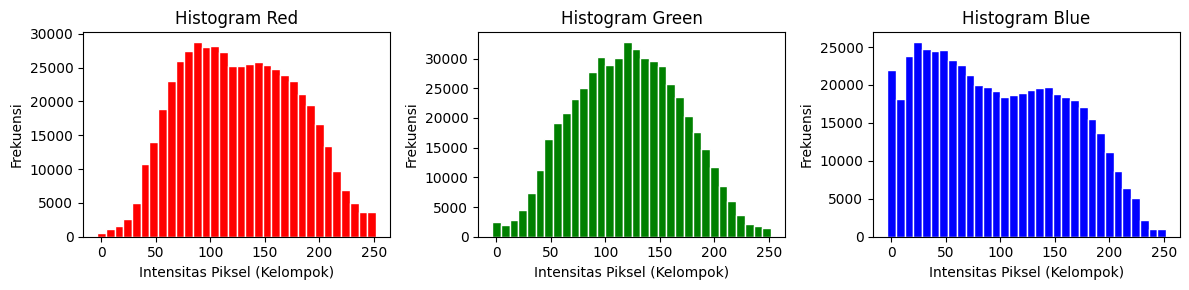

In [102]:
# Kalkulasi histogram untuk tiap RGB
colors = ('r', 'g', 'b')
titles = ('Histogram Red', 'Histogram Green', 'Histogram Blue')

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
num_bins = 32  
bin_edges = np.linspace(0, 256, num_bins + 1)  

for i, (color, title) in enumerate(zip(colors, titles)):
    hist, _ = np.histogram(image_rgb[:, :, i], bins=bin_edges)
    axes[i].bar(bin_edges[:-1], hist, width=8, color=color, edgecolor='white', linewidth=1)
    axes[i].set_title(title)
    axes[i].set_xlabel("Intensitas Piksel (Kelompok)")
    axes[i].set_ylabel("Frekuensi")
    axes[i].set_xticks(np.arange(0, 256, 50))   
plt.tight_layout()
plt.show()

### 3. Histogram Kumulatif

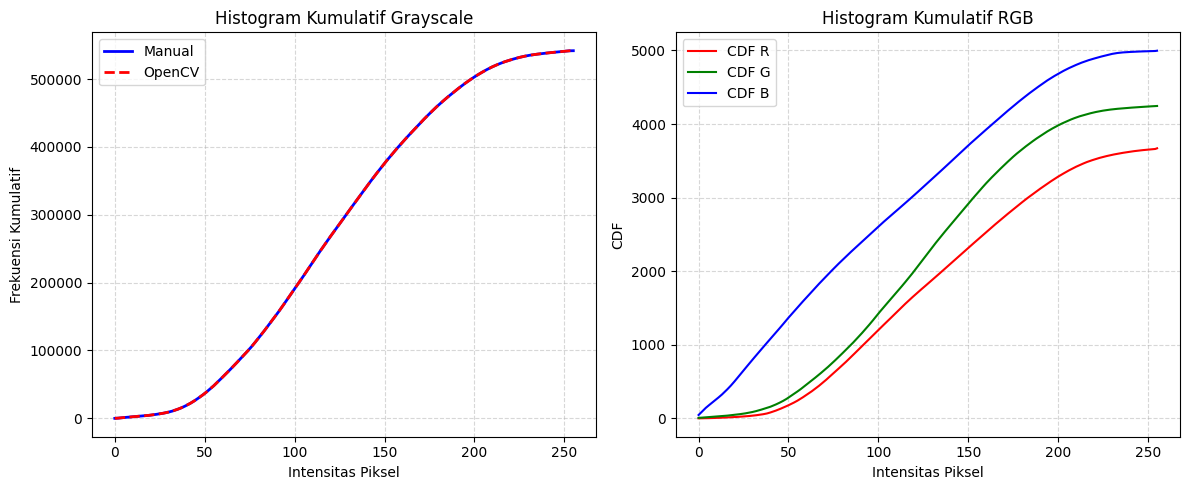

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

# Histogram Kumulatif Grayscale
axes[0].plot(hist_cumulative_manual, color='blue', linestyle='-', linewidth=2, label="Manual")
axes[0].plot(hist_cumulative_cv, color='red', linestyle='dashed', linewidth=2, label="OpenCV")
axes[0].set_title("Histogram Kumulatif Grayscale")
axes[0].set_xlabel("Intensitas Piksel")
axes[0].set_ylabel("Frekuensi Kumulatif")
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)

# Histogram Kumulatif RGB
for i, color in enumerate(colors):
    hist = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    axes[1].plot(cdf_normalized, color=color, label=f'CDF {color.upper()}')
axes[1].legend()
axes[1].set_title("Histogram Kumulatif RGB")
axes[1].set_xlabel("Intensitas Piksel")
axes[1].set_ylabel("CDF")
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()  
plt.show()

### 4. Normalisasi Histogram

In [ ]:
url = 'https://drive.google.com/uc?id=1LLjuSVYn31ZHRO5s6BwAT-rP06io2HAL' 
output = 'image2.jpg'
gdown.download(url, output, quiet=False)

image2 = cv2.imread(output)
image_gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

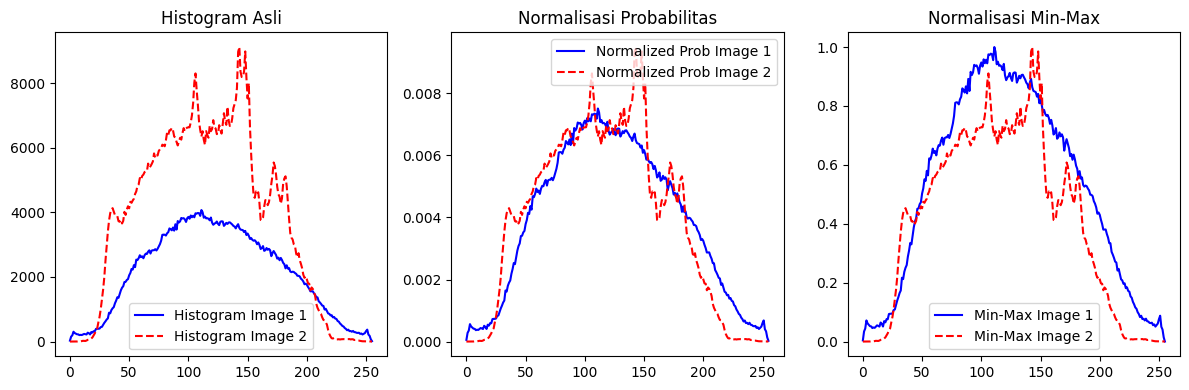

In [107]:
# Hitung histogram kedua gambar
hist1, bins1 = np.histogram(image_gray.ravel(), bins=256, range=[0, 256])
hist2, bins2 = np.histogram(image_gray2.ravel(), bins=256, range=[0, 256])

# Normalisasi Probabilitas
hist1_prob = hist1 / image_gray.size
hist2_prob = hist2 / image_gray2.size

# Normalisasi Min-Max
hist1_minmax = (hist1 - hist1.min()) / (hist1.max() - hist1.min())
hist2_minmax = (hist2 - hist2.min()) / (hist2.max() - hist2.min())

# Plot Histogram
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot Histogram Asli
axes[0].plot(hist1, color='blue', label='Histogram Image 1')
axes[0].plot(hist2, color='red', linestyle='dashed', label='Histogram Image 2')
axes[0].set_title("Histogram Asli")
axes[0].legend()

# Plot Normalisasi Probabilitas
axes[1].plot(hist1_prob, color='blue', label='Normalized Prob Image 1')
axes[1].plot(hist2_prob, color='red', linestyle='dashed', label='Normalized Prob Image 2')
axes[1].set_title("Normalisasi Probabilitas")
axes[1].legend()

# Plot Normalisasi Min-Max
axes[2].plot(hist1_minmax, color='blue', label='Min-Max Image 1')
axes[2].plot(hist2_minmax, color='red', linestyle='dashed', label='Min-Max Image 2')
axes[2].set_title("Normalisasi Min-Max")
axes[2].legend()

plt.tight_layout()
plt.show()

### 5. Karasteristik Histogram

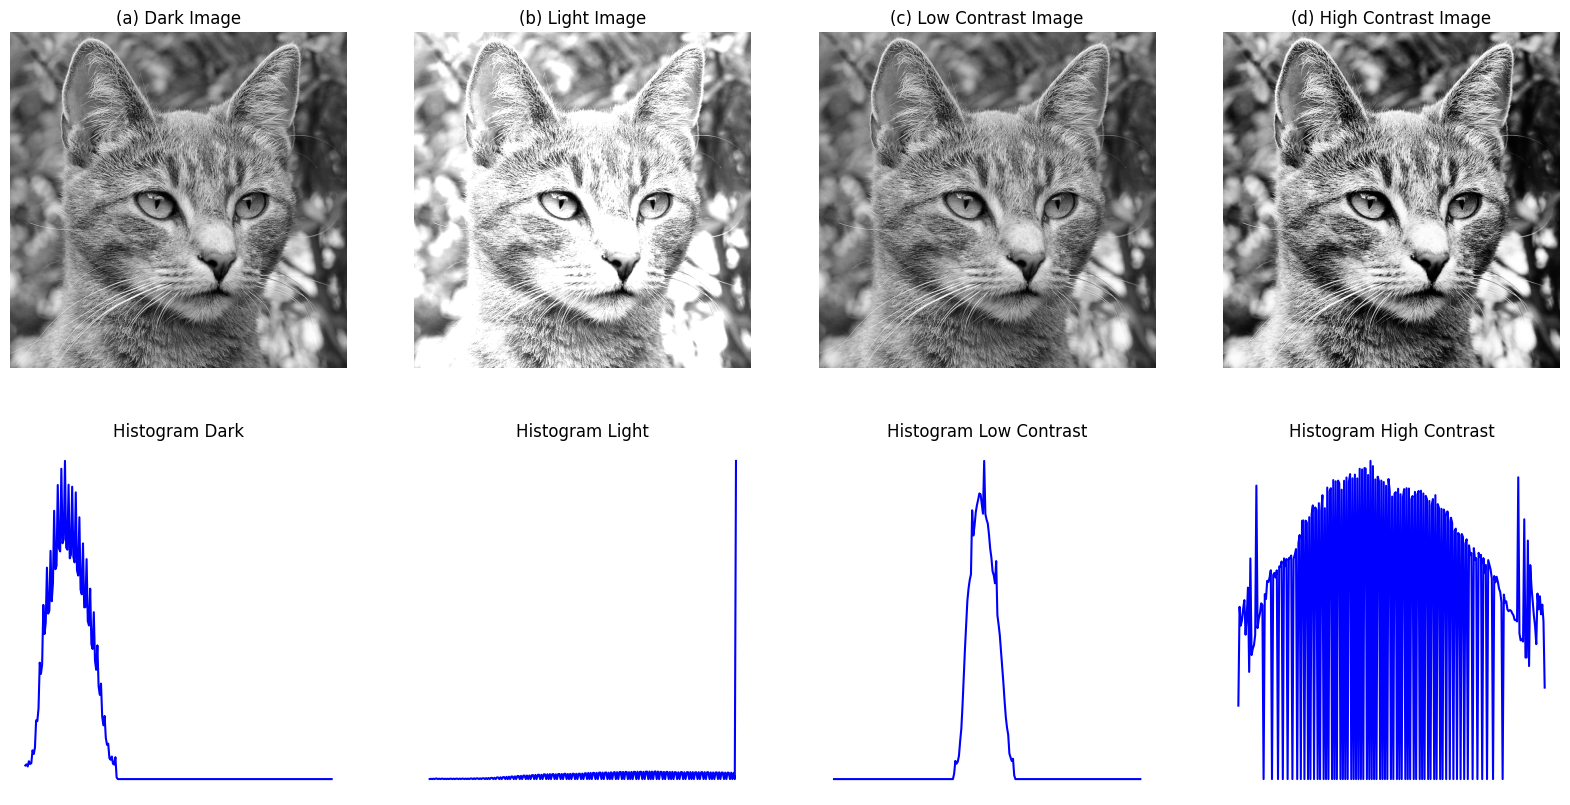

In [114]:
low_intensity = sum(hist_manual[:50]) / sum(hist_manual)
high_intensity = sum(hist_manual[200:]) / sum(hist_manual)
range_intensity = np.where(hist_manual > 0)[0]
spread = range_intensity[-1] - range_intensity[0]

fig, ax = plt.subplots(2, 4, figsize=(20, 10))

# Dark Image
image_dark = np.clip(image_gray * 0.3, 0, 255).astype(np.uint8)
hist_dark = cv2.calcHist([image_dark], [0], None, [256], [0, 256])
ax[0, 0].imshow(image_dark, cmap='gray')
ax[0, 0].set_title("(a) Dark Image")
ax[1, 0].plot(hist_dark, color='blue')
ax[1, 0].set_title("Histogram Dark")

# Light Image
image_light = np.clip(image_gray * 1.7, 0, 255).astype(np.uint8)
hist_light = cv2.calcHist([image_light], [0], None, [256], [0, 256])
ax[0, 1].imshow(image_light, cmap='gray')
ax[0, 1].set_title("(b) Light Image")
ax[1, 1].plot(hist_light, color='blue')
ax[1, 1].set_title("Histogram Light")

# Low Contrast Image
image_low_contrast = cv2.normalize(image_gray, None, 100, 150, cv2.NORM_MINMAX)
hist_low_contrast = cv2.calcHist([image_low_contrast], [0], None, [256], [0, 256])
ax[0, 2].imshow(image_low_contrast, cmap='gray')
ax[0, 2].set_title("(c) Low Contrast Image")
ax[1, 2].plot(hist_low_contrast, color='blue')
ax[1, 2].set_title("Histogram Low Contrast")

# High Contrast Image
image_high_contrast = cv2.equalizeHist(image_gray)
hist_high_contrast = cv2.calcHist([image_high_contrast], [0], None, [256], [0, 256])
ax[0, 3].imshow(image_high_contrast, cmap='gray')
ax[0, 3].set_title("(d) High Contrast Image")
ax[1, 3].plot(hist_high_contrast, color='blue')
ax[1, 3].set_title("Histogram High Contrast")

for a in ax.flatten():
    a.axis("off")
plt.show()